In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv('C://Users//Nandini MUKKA//Downloads//HR_data.csv')
df.head()

,SLNO,Candidate.Ref,DOJ.Extended,Duration.to.accept.offer,Notice.period,Offered.band,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Joining.Bonus,Candidate.relocate.actual,Gender,Candidate.Source,Rex.in.Yrs,LOB,Location,Age,Status
0,1,2110407,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,2,2112635,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
2,3,2112838,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,4,2115021,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
4,5,2115125,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined


In [3]:
df.shape

(8995, 18)

In [4]:
df.isnull().sum()

SLNO                           0
Candidate.Ref                  0
DOJ.Extended                   0
Duration.to.accept.offer       0
Notice.period                  0
Offered.band                   0
Pecent.hike.expected.in.CTC    0
Percent.hike.offered.in.CTC    0
Percent.difference.CTC         0
Joining.Bonus                  0
Candidate.relocate.actual      0
Gender                         0
Candidate.Source               0
Rex.in.Yrs                     0
LOB                            0
Location                       0
Age                            0
Status                         0
dtype: int64

In [5]:
df.shape

(8995, 18)

In [6]:
d1=df.drop(columns=['SLNO','Candidate.Ref'],axis=0)


In [7]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8995 entries, 0 to 8994
Data columns (total 16 columns):
DOJ.Extended                   8995 non-null object
Duration.to.accept.offer       8995 non-null int64
Notice.period                  8995 non-null int64
Offered.band                   8995 non-null object
Pecent.hike.expected.in.CTC    8995 non-null float64
Percent.hike.offered.in.CTC    8995 non-null float64
Percent.difference.CTC         8995 non-null float64
Joining.Bonus                  8995 non-null object
Candidate.relocate.actual      8995 non-null object
Gender                         8995 non-null object
Candidate.Source               8995 non-null object
Rex.in.Yrs                     8995 non-null int64
LOB                            8995 non-null object
Location                       8995 non-null object
Age                            8995 non-null int64
Status                         8995 non-null object
dtypes: float64(3), int64(4), object(9)
memory usage: 1.1+ MB


In [8]:
d1.shape

(8995, 16)

In [9]:
corr=d1.corr()

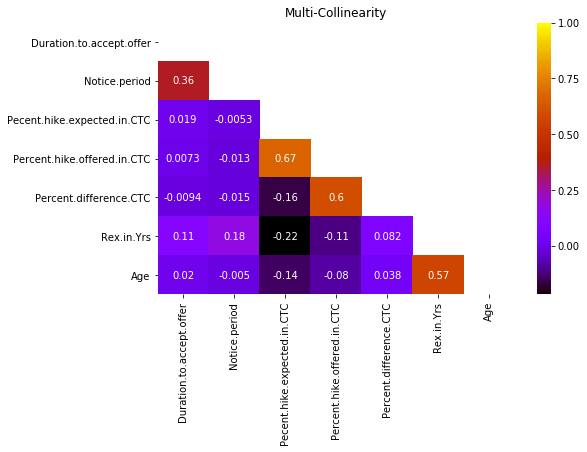

In [10]:
mask=np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
plt.figure(figsize=(8,5))
sns.heatmap(corr,annot=True,cmap='gnuplot',mask=mask)
plt.title('Multi-Collinearity')
plt.show()

In [11]:
#consider only numerical data
num_col=d1.dtypes[df.dtypes=='int64'].index

In [12]:
x_num=d1[num_col]

In [13]:
x_num.shape

(8995, 4)

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [58]:
vif=pd.DataFrame()
vif['Features']=x_num.keys()
vif['VIF Score']=[variance_inflation_factor(x_num.values,i) for i in range(4)]
vif

,Features,VIF Score
0,Duration.to.accept.offer,1.951738
1,Notice.period,4.562312
2,Rex.in.Yrs,4.834467
3,Age,7.014953


# creating Dummmies

In [16]:
df_dum=pd.get_dummies(d1,drop_first=True)
df_dum.head()

,Duration.to.accept.offer,Notice.period,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Rex.in.Yrs,Age,DOJ.Extended_Yes,Offered.band_E1,Offered.band_E2,...,Location_Chennai,Location_Cochin,Location_Gurgaon,Location_Hyderabad,Location_Kolkata,Location_Mumbai,Location_Noida,Location_Others,Location_Pune,Status_Not Joined
0,14,30,-20.79,13.16,42.86,7,34,1,0,1,...,0,0,0,0,0,0,1,0,0,0
1,18,30,50.00,320.00,180.00,8,34,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,3,45,42.84,42.84,0.00,4,27,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,26,30,42.84,42.84,0.00,4,34,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,1,120,42.59,42.59,0.00,6,34,1,0,1,...,0,0,0,0,0,0,1,0,0,0


In [17]:
# splitting data into independent and dependent variables
x=df_dum.iloc[:,:-1]
y=df_dum.iloc[:,-1]

0    7313
1    1682
Name: Status_Not Joined, dtype: int64

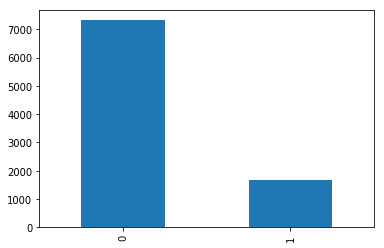

In [60]:
pd.Series(y).value_counts().plot('bar')
pd.Series(y).value_counts()

In [59]:
y.value_counts()

0    7313
1    1682
Name: Status_Not Joined, dtype: int64

In [19]:
df_dum.shape

(8995, 35)

# Building a Model

In [20]:
import statsmodels.api as sm

In [21]:
model=sm.GLM(y,x).fit()
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:      Status_Not Joined   No. Observations:                 8995
Model:                            GLM   Df Residuals:                     8961
Model Family:                Gaussian   Df Model:                           33
Link Function:               identity   Scale:                         0.13754
Method:                          IRLS   Log-Likelihood:                -3824.0
Date:                Tue, 05 Nov 2019   Deviance:                       1232.5
Time:                        02:46:24   Pearson chi2:                 1.23e+03
No. Iterations:                     3   Covariance Type:             nonrobust
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Duration.to.accept.offer           -5.451e-05      0.000     -0.312      0.755     

In [22]:
model=sm.GLM(y,x).fit()
while model.pvalues.sort_values(ascending=False)[0] > 0.025:
    model=sm.GLM(y,x).fit()
    high = model.pvalues.sort_values(ascending=False).index[0]
    x.drop(high,axis=1,inplace=True)

In [23]:
x.shape

(8995, 26)

In [24]:
df1=pd.concat((x,y),axis=1)
df1.head()

,Notice.period,Age,DOJ.Extended_Yes,Offered.band_E1,Offered.band_E2,Offered.band_E3,Candidate.relocate.actual_Yes,Candidate.Source_Direct,Candidate.Source_Employee Referral,LOB_BFSI,...,Location_Chennai,Location_Cochin,Location_Gurgaon,Location_Hyderabad,Location_Kolkata,Location_Mumbai,Location_Noida,Location_Others,Location_Pune,Status_Not Joined
0,30,34,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,30,34,0,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,45,27,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,30,34,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,120,34,1,0,1,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0


# upsampling

In [25]:
x=df1.iloc[:,:-1] #independent
y=df1.iloc[:,-1] # dependent

In [26]:
x.shape,y.shape

((8995, 26), (8995,))

In [27]:
import imblearn
from imblearn.over_sampling import SMOTE

In [28]:
x_resample,y_resample=SMOTE(k_neighbors=5).fit_resample(x,y) 

1    7313
0    7313
dtype: int64

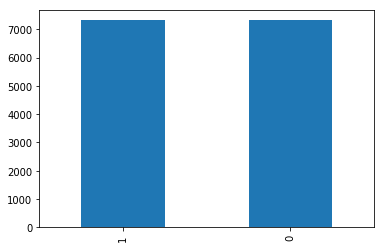

In [29]:
pd.Series(y_resample).value_counts().plot('bar')
pd.Series(y_resample).value_counts()

In [30]:
np.savez('hroversample.npz',x_resample,y_resample)

In [31]:
#load data
data_over=np.load('hroversample.npz')
data_over.files

['arr_0', 'arr_1']

In [32]:
x_over=data_over['arr_0']
y_over=data_over['arr_1']

1    7313
0    7313
dtype: int64

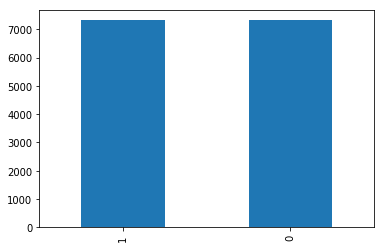

In [33]:
pd.Series(y_over).value_counts().plot('bar')
pd.Series(y_over).value_counts()

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=0.2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((11700, 26), (2926, 26), (11700,), (2926,))

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

# Maximum Likilehood Estimation

In [37]:
# for trsining data
y_pred_train=model.predict_proba(x_train)
y_pred_train_1=y_pred_train[:,1]

In [38]:
y_pred_train_1

array([5.12070817e-01, 7.91498640e-01, 5.77189652e-01, ...,
       5.67404274e-01, 7.03485304e-04, 1.35397864e-01])

In [39]:
class threshold():
    def __init__(self):
        self.th=0.5
        
    def predict_threshold(self,y):
         if y>=self.th:
            return 1
         else:
            return 0

In [40]:
from sklearn.metrics import log_loss

In [41]:
y_pred_train_prob_1=y_pred_train_1
probabilities=np.linspace(0,1,num=100)
pre=threshold()
mle=[]
for p in probabilities:
    pre.th=p
    yy=pd.Series(y_pred_train_prob_1)
    y_pred_0_5=yy.apply(pre.predict_threshold)
    loss=log_loss(y_train,y_pred_0_5)
    mle.append(loss)

Threshold Probability Value= 0.48484848484848486


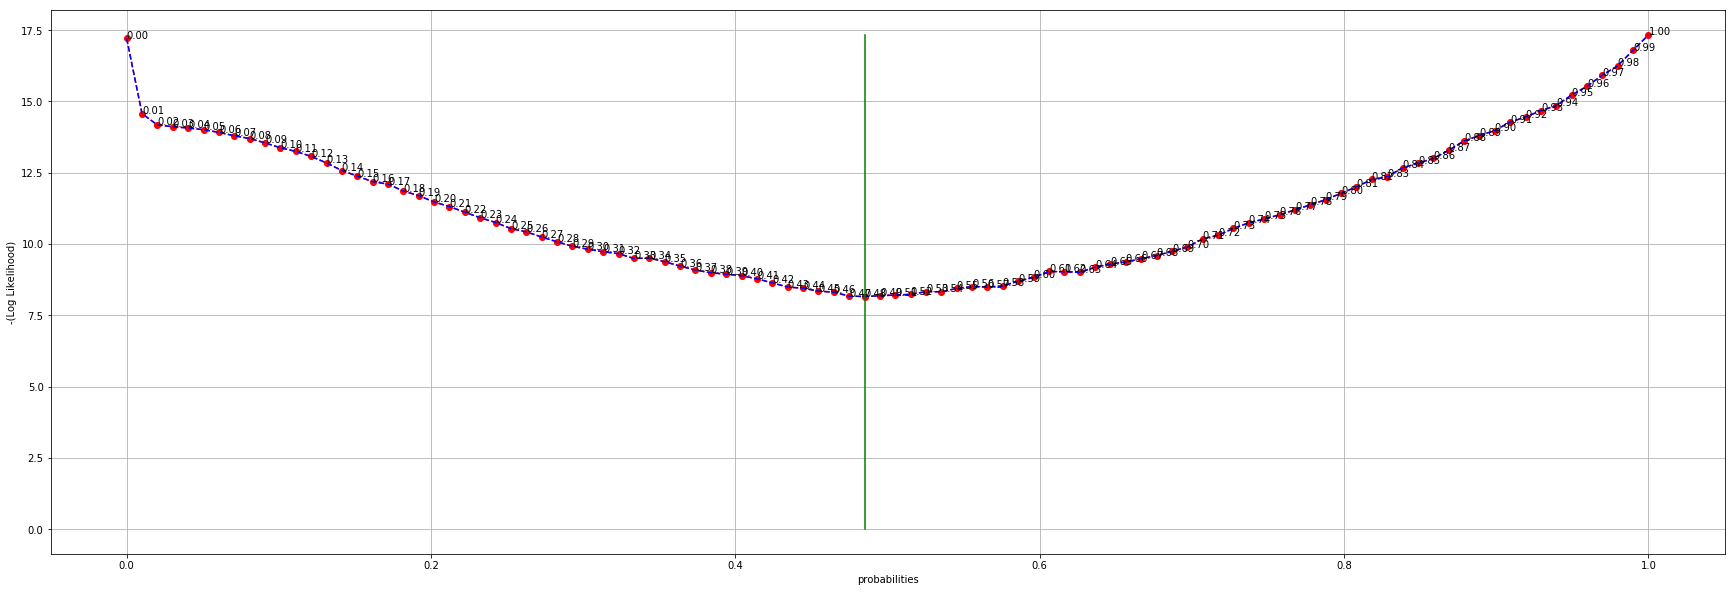

In [42]:
# visualize
plt.figure(figsize=(30,10))
plt.plot(probabilities,mle,'ro--')
plt.plot(probabilities,mle,'b--')
ind=np.array(mle).argmin()
mx=max(mle)
val=probabilities[ind]
print('Threshold Probability Value=',val)
plt.plot([val,val],[0,mx],'g')

for i,p in enumerate(probabilities):
    plt.text(probabilities[i],mle[i],'%0.2f'%(p))
plt.xlabel('probabilities')
plt.ylabel('-(Log Likelihood)')
plt.grid()
plt.show()

In [43]:
y_pred_prob_test=model.predict_proba(x_test)
y_pred_prob_test_1=y_pred_prob_test[:,1]

In [44]:
pre=threshold() # Predictor class
threh_prob=0.545 # from MLE
pre.th=threh_prob # setting threshold
yy=pd.Series(y_pred_prob_test_1) # converting prob array into series
y_pred_class_test=yy.apply(pre.predict_threshold) # apply predictor class


In [45]:
from sklearn.metrics import classification_report,confusion_matrix

In [46]:
cm=confusion_matrix(y_test,y_pred_class_test)
cm

array([[1153,  331],
       [ 351, 1091]], dtype=int64)

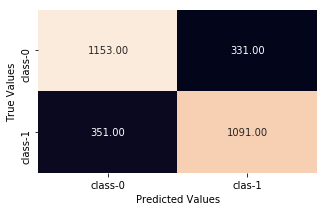

In [47]:
plt.figure(figsize=(5,3))
sns.heatmap(cm,annot=True,fmt='0.2f',xticklabels=['class-0','clas-1'],yticklabels=['class-0','class-1'],cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

In [48]:
cr=classification_report(y_test,y_pred_class_test)
print(cr)

              precision    recall  f1-score   support

           0       0.77      0.78      0.77      1484
           1       0.77      0.76      0.76      1442

    accuracy                           0.77      2926
   macro avg       0.77      0.77      0.77      2926
weighted avg       0.77      0.77      0.77      2926



In [49]:
from sklearn.metrics import cohen_kappa_score

In [50]:
cohen_kappa_score(y_test,y_pred_class_test)

0.5336469879991101

In [51]:
pre=threshold() # Predictor class
threh_prob=0.339 # from MLE
pre.th=threh_prob # setting threshold
yy=pd.Series(y_pred_prob_test_1) # converting prob array into series
y_pred_class_test=yy.apply(pre.predict_threshold) # apply predictor class


In [52]:
cm=confusion_matrix(y_test,y_pred_class_test)
cm

array([[ 784,  700],
       [ 132, 1310]], dtype=int64)

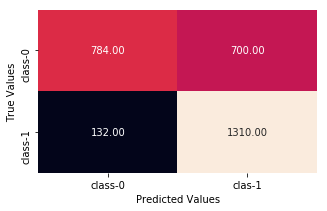

In [53]:
plt.figure(figsize=(5,3))
sns.heatmap(cm,annot=True,fmt='0.2f',xticklabels=['class-0','clas-1'],yticklabels=['class-0','class-1'],cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

In [54]:
cr=classification_report(y_test,y_pred_class_test)
print(cr)

              precision    recall  f1-score   support

           0       0.86      0.53      0.65      1484
           1       0.65      0.91      0.76      1442

    accuracy                           0.72      2926
   macro avg       0.75      0.72      0.71      2926
weighted avg       0.76      0.72      0.71      2926



In [55]:
cohen_kappa_score(y_test,y_pred_class_test)

0.4343413313902046